In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/wine.data.csv', sep=",")
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Feature (X) and target (Y) separation

In [31]:
X = df.drop(columns=['Class'])
y = df['Class']

Standardize the data

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data into training and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train Random Forest

In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Assessment Random Forest

In [35]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Train SVM

In [36]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

Assessment SVM

In [37]:
y_pred_svm = svm_model.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Apply PCA to reduce to 2 dimensions

In [38]:
pca = PCA(n_components=2)  # Réduction à 2 dimensions
X_pca = pca.fit_transform(X_scaled)

Display the variance explained by each component

In [39]:
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par chaque composante : {explained_variance}")
print(f"Variance totale expliquée : {sum(explained_variance):.2f}")

Variance expliquée par chaque composante : [0.36198848 0.1920749 ]
Variance totale expliquée : 0.55


Viewing projected data

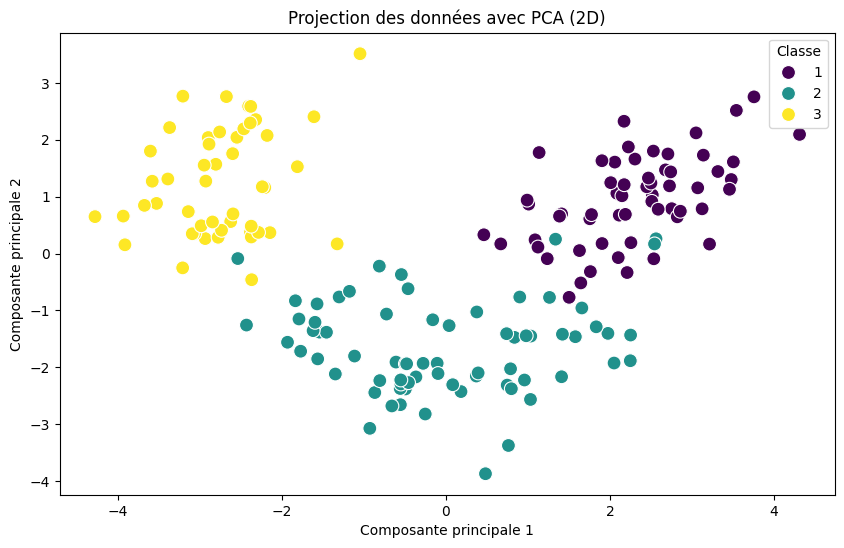

In [40]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x ='PCA1', y ='PCA2', hue='target', data=df_pca, palette='viridis', s=100
)
plt.title('Projection des données avec PCA (2D)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='Classe', loc='best')
plt.show()